##  Modeling the Impact of Root Distributions Parameterizations on Total Evapotranspiration in the Reynolds Mountain East catchment using pySUMMA

## 1. Introduction

One part of the Clark et al. (2015) study explored the impact of root distribution on total evapotranspiration (ET) using a SUMMA model for the Reynolds Mountain East catchment. This study looked at sensitivity of different root distribution exponents (0.25, 0.5, 1.0). The sensitivity of evapotranspiration to the distribution of roots, which dictates the capability of plants to access water. 

In this Jupyter Notebook, the pySUMMA library is used to reproduce this analysis. According to the application of different root distribution exponenets (0.25, 0.5, 1.0), the sensitivity of result describes. 
The Results section shows how to use pySUMMA and the Pandas library to reproduce Figure 8(left) from Clark et al. (2015). 

Collectively, this Jupyter Notebook serves as an example of how hydrologic modeling can be conducted directly within a Jupyter Notebook by leveraging the pySUMMA library. 

## 2. Background

### The Transpiration from soil layers available in SUMMA

\begin{equation*}
(S_{et}^{soil})_j = \frac{(f_{roots})_j(\beta_{v})_j}{\beta_v} \frac{(Q_{trans}^{veg})}{L_{vap}\rho_{liq}(\Delta z)_j} + (S_{evap}^{soil})_j 
\end{equation*}

The transpiration sink term $(S_{et}^{soil})_j$ is computted for a given soil layer $j$.

$Q_{trans}^{veg} (W/m^2)$ : the transpiration flux, $(\beta_{v})_j$ : the soil water stress for the j-th soil layer

$\beta_v$ : the total water availability stress factor, $(f_{roots})_j$ : the fraction of roots in the j-th soil layer

$(\Delta z)_j$ : the depth of the j-th soil layer, $L_{vap} (J/kg), \rho_{liq} (kg/m^3)$ : respectively the latent heat of vaporization and the intrinsic density of liquid water

$(S_{evap}^{soil})_j     (s^{-1})$ : the ground evaporation (only defined for the upper-most soil layer)

The above images are taken from the Stomal Resistance Method section within the manual Structure for Unifying Multiple Modeling Alternatives (SUMMA), Version 1.0: Technical Description (April, 2015).

## 3. Methods

### 1) Install pySUMMA from GitHub (UVA-Hydroinformatics/pysumma-master)

In [ ]:
# On CyberGIS-Jupyter for water, pySUMMA installed, so users don't need to install pySUMMA.
import sys
!{sys.executable} -m pip install git+https://github.com/UW-Hydro/pysumma.git@master --upgrade

### 2) Download SUMMA Model Instance from HydroShare

In [1]:
from pysumma import hydroshare_utils
import os

In [2]:
# Download SUMMA Model Instance from HydroShare
resource_id = '85a0a9a6ceb54959b0b59a220c207a12'
instance = hydroshare_utils.get_hs_resource(resource_id, os.getcwd())

Username: choi
Password for choi: ········


In [3]:
!cd {instance}/; chmod +x ./installTestCases_local.sh
!cd {instance}/; ./installTestCases_local.sh

TestCases installed


### 3) Study Area

#### The Reynolds Mountain East catchment is located in southwestern Idaho as shown in the figure below.

<img src="SummaModel_ReynoldsAspenStand_RootDistribution/data/gis/study_area.jpg" width="1000">

In [ ]:
import sys
!{sys.executable} -m pip install geoviews

Populating the interactive namespace from numpy and matplotlib


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
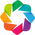

In [4]:
%pylab inline
import cartopy
import geoviews as gv
import holoviews as hv
hv.notebook_extension('bokeh')

In [5]:
shapefile = os.path.join(os.getcwd(), instance, "data/gis/Reynolds_Creek_watershed_wgs84.shp")
shapes = cartopy.io.shapereader.Reader(shapefile)
(gv.tile_sources.StamenTerrainRetina
 * gv.Shape.from_shapefile(shapefile, crs=cartopy.crs.PlateCarree(), value="LABLE", index="value").opts(
     style=dict(fill_color='honeydew', line_color='navy', alpha=0.5, cmap='Reds'))
).opts(width=900, height=500)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (value)

### 4) Create pySUMMA Simulation Object

In [6]:
import pysumma as ps

In [7]:
instance = "SummaModel_ReynoldsAspenStand_RootDistribution"
executable = "/usr/bin/summa.exe"  # This setting of summa.exe for CyberGIS-Jupyter for water
executable

'/usr/bin/summa.exe'

In [8]:
# path to the SUMMA filemanager file
file_manager = os.path.join(os.getcwd(), instance, 'settings/summa_fileManager_riparianAspenPerturbRoots.txt')
file_manager

'/home/jovyan/work/Jupyter_Book/pySUMMA_Jupyter_Book/pysumma_tutorial_jupyterbook/docs/SummaModel_ReynoldsAspenStand_RootDistribution/settings/summa_fileManager_riparianAspenPerturbRoots.txt'

In [9]:
# Create pySUMMA Simulation Object
S = ps.Simulation(executable, file_manager)

### 5) Check root Distribution Exponents

In [10]:
S.trial_params

<xarray.Dataset>
Dimensions:             (hru: 5)
Dimensions without coordinates: hru
Data variables:
    hruIndex            (hru) float64 1.001e+03 1.002e+03 ... 1.005e+03
    frozenPrecipMultip  (hru) float64 1.0 1.0 1.0 1.1 1.2
    theta_mp            (hru) float64 0.2211 0.2211 0.2211 0.2211 0.2211
    theta_sat           (hru) float64 0.4792 0.4792 0.4792 0.4792 0.4792
    theta_res           (hru) float64 0.1 0.1 0.1 0.1 0.1
    vGn_alpha           (hru) float64 -0.858 -0.858 -0.858 -0.858 -0.858
    vGn_n               (hru) float64 1.306 1.306 1.306 1.306 1.306
    f_impede            (hru) float64 0.0 0.0 0.0 0.0 0.0
    k_soil              (hru) float64 3.53e-06 3.53e-06 ... 3.53e-06 3.53e-06
    k_macropore         (hru) float64 0.06255 0.06255 0.06255 0.06255 0.06255
    critSoilWilting     (hru) float64 0.125 0.125 0.125 0.125 0.125
    critSoilTranspire   (hru) float64 0.2 0.2 0.2 0.2 0.2
    winterSAI           (hru) float64 0.45 0.45 0.45 0.45 0.45
    summerLAI           (hru) float64 2.5 2.5 2.5 2.5 2.5
    heightCanopyTop     (hru) float64 9.5 9.5 9.5 9.5 9.5
    heightCanopyBottom  (hru) float64 3.0 3.0 3.0 3.0 3.0
    kAnisotropic        (hru) float64 1.0 1.0 1.0 1.0 1.0
    rootDistExp         (hru) float64 1.0 0.5 0.25 1.0 1.0
    zScale_TOPMODEL     (hru) float64 4.057 4.057 4.057 4.057 4.057
    qSurfScale          (hru) float64 84.06 84.06 84.06 84.06 84.06
Attributes:
    history:  Converted to NetCDF using "/Users/nijssen/Dropbox/data/PLUMBER/...

In [11]:
S.trial_params["rootDistExp"]

<xarray.DataArray 'rootDistExp' (hru: 5)>
array([1.  , 0.5 , 0.25, 1.  , 1.  ])
Dimensions without coordinates: hru

### 6) Run SUMMA for the different root Distribution Exponents and stomatal resistance parameterization

In [12]:
# set the simulation start and finish times
S.manager['simStartTime'].value  = "2006-07-01 00:00"
S.manager['simEndTime'].value = "2007-09-30 00:00"
S.manager.write()

In [13]:
print(S.manager)

controlVersion                       'SUMMA_FILE_MANAGER_V3.0.0'
simStartTime                         '2006-07-01 00:00'
simEndTime                           '2007-09-30 00:00'
tmZoneInfo                           'localTime'
settingsPath                         '/home/jovyan/work/Jupyter_Book/pySUMMA_Jupyter_Book/pysumma_tutorial_jupyterbook/docs/SummaModel_ReynoldsAspenStand_RootDistribution/settings/'
forcingPath                          '/home/jovyan/work/Jupyter_Book/pySUMMA_Jupyter_Book/pysumma_tutorial_jupyterbook/docs/SummaModel_ReynoldsAspenStand_RootDistribution/data/forcingData/'
outputPath                           '/home/jovyan/work/Jupyter_Book/pySUMMA_Jupyter_Book/pysumma_tutorial_jupyterbook/docs/SummaModel_ReynoldsAspenStand_RootDistribution/output/'
decisionsFile                        'summa_zDecisions_riparianAspenPerturbRoots.txt'
outputControlFile                    'meta/Model_Output.txt'
globalHruParamFile                   'summa_zLocalParamInfo.txt'
globalGruP

In [14]:
# query for the available stomatal resistance parameterizations
S.decisions["stomResist"].available_options

['BallBerry', 'Jarvis', 'simpleResistance', 'BallBerryFlex', 'BallBerryTest']

In [15]:
S.decisions['stomResist'] = 'simpleResistance'
S.manager.write()
S.decisions['stomResist'].value

'simpleResistance'

In [16]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    simpleResistance     ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

#### 6.1) run the model with giving the run suffix "simpleResistance"

In [17]:
S.run('local', run_suffix='_simpleResistance')
results_simpleResistance_ncfile = S.get_output_files()

#### 6.2) run the model with giving the run suffix "Ball Berry"

In [18]:
S.decisions['stomResist'] = 'BallBerry'
S.manager.write()
S.decisions['stomResist'].value

'BallBerry'

In [19]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    BallBerry            ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

In [20]:
S.run('local', run_suffix='_BallBerry')
results_BallBerry_ncfile = S.get_output_files()

#### 6.3) run the model with giving the run suffix "Jarvis"

In [21]:
S.decisions['stomResist'] = 'Jarvis'
S.manager.write()
S.decisions['stomResist'].value

'Jarvis'

In [22]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    Jarvis               ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

In [23]:
S.run('local', run_suffix='_Jarvis')
results_Jarvis_ncfile = S.get_output_files()

## 4. Results

### Recreate the Figure 8(left) plot from Clark et al., 2015: The total ET Sensitivity with different root Distribution Exponents and stomal resistance parameterization

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from pysumma.plotting.plotting import Plotting

#### 4.1) Create function to calculate Total ET of hour of day from SUMMA output for the period 1 June to 20 August 2007

In [25]:
def calc_total_et(et_output_df):
    # Total Evapotranspiration = Lateral Heat Flux (scalarLatHeatTotal)
    # Change unit from kgm-2s-1 to mm/hr 
    total_et_data = (et_output_df['scalarLatHeatTotal'])*3600/2260000
    # create dates(X-axis) attribute from ouput netcdf
    dates = total_et_data.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = total_et_data.data
    # create two dimensional tabular data structure 
    total_et_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_et_df.index = total_et_df.index.round("H")
    # set the time period to display plot 
    total_et_df = total_et_df.loc["2007-05-31 23:00:00":"2007-08-20 23:00:00"]
    # resample data by the average value hourly
    total_et_df_hourly = total_et_df.resample("H").mean()
    # resample data by the average for hour of day
    total_et_by_hour = total_et_df_hourly.groupby(total_et_df_hourly.index.hour).mean()
    total_et_by_hour.index.name = 'hour'
    col_name = ['sim0','sim1','sim2']
    for index, value in enumerate(col_name):
        total_et_by_hour[value]= total_et_by_hour[index]
    # calculate 3 hour moving average
    total_et_by_hour.loc['24'] = total_et_by_hour.loc[0].values
    for index in range(1,23,1):
        total_et_by_hour['sim0'][index] = (total_et_by_hour[0][index-1]+total_et_by_hour[0][index]+total_et_by_hour[0][index+1])/3
        total_et_by_hour['sim1'][index] = (total_et_by_hour[1][index-1]+total_et_by_hour[1][index]+total_et_by_hour[1][index+1])/3
        total_et_by_hour['sim2'][index] = (total_et_by_hour[2][index-1]+total_et_by_hour[2][index]+total_et_by_hour[2][index+1])/3
    return total_et_by_hour

#### 4.2) Get hour of day output of the Parameterization of Root Distributions for the period 1 June to 20 August 2007

In [26]:
results_sim_rootDistExp = xr.open_dataset(results_simpleResistance_ncfile[0])
results_ball_rootDistExp = xr.open_dataset(results_BallBerry_ncfile[0])
results_jar_rootDistExp = xr.open_dataset(results_Jarvis_ncfile[0])
simResist_rootDistExp = calc_total_et(results_sim_rootDistExp)
BallBerry_rootDistExp = calc_total_et(results_ball_rootDistExp)
Jarvis_rootDistExp = calc_total_et(results_jar_rootDistExp)

In [27]:
# create each rootDistExp object
simResist_rootDistExp_1 = simResist_rootDistExp['sim0']
simResist_rootDistExp_0_5 = simResist_rootDistExp['sim1']
simResist_rootDistExp_0_25 = simResist_rootDistExp['sim2']

#### 4.3) Combine the Parameterization of Root Distributions with Simple stomatal resistance into a single Pandas Dataframe

In [28]:
# Combine ET for each rootDistExp
sim_ET_Combine = pd.concat([simResist_rootDistExp_1, simResist_rootDistExp_0_5, simResist_rootDistExp_0_25], axis=1)
# add label 
sim_ET_Combine.columns = ['simResist(Root Exp = 1.0)', 'simResist(Root Exp = 0.5)', 'simResist(Root Exp = 0.25)']

In [29]:
sim_ET_Combine

,simResist(Root Exp = 1.0),simResist(Root Exp = 0.5),simResist(Root Exp = 0.25)
hour,,,
0,-0.049275,-0.049935,-0.051854
1,-0.044649,-0.044973,-0.047093
2,-0.040888,-0.041116,-0.043394
3,-0.038232,-0.038557,-0.040793
4,-0.038303,-0.038253,-0.039883
5,-0.040011,-0.039439,-0.040326
6,-0.049182,-0.048181,-0.048460
7,-0.074199,-0.072854,-0.072716
8,-0.114166,-0.112334,-0.111562


#### 4.4) Add obervation data in Aspen station in Reynolds Mountain East to the plot

In [30]:
# create pySUMMA Plotting Object
Val_eddyFlux = Plotting(os.getcwd() + '/' + instance + '/data/validationData/ReynoldsCreek_eddyFlux.nc')

In [31]:
# read Total Evapotranspiration(LE-wpl) AND Wind(WindFlag) from validation netcdf file
Obs_Evapotranspitaton = Val_eddyFlux.ds['LE-wpl']
Obs_Wind = Val_eddyFlux.ds['WindFlag']
# create dates(X-axis) attribute from validation netcdf file
dates = Obs_Evapotranspitaton.coords['time'].data
# create obs_data(Y-axis) attribute from validation netcdf file
obs_evap = Obs_Evapotranspitaton.data
obs_wind = Obs_Wind.data
# create two dimensional tabular data structure 
df_evap = pd.DataFrame(obs_evap, index=dates)
df_wind = pd.DataFrame(obs_wind, index=dates)
# set the time period to display plot
df_evap_filt = df_evap.loc["2007-05-31 23:00:00":"2007-08-20 22:30:00"]
df_wind_filt = df_wind.loc["2007-05-31 23:00:00":"2007-08-20 22:30:00"]   #"2007-06-01":"2007-08-20"
# select aspen obervation station among three different stations
df_evap_filt.columns = ['-','Obs_evap (aspen)','-']
df_wind_filt.columns = ['-','Obs_wind (aspen)','-']
# Combine total evapotranspiration and wind data
obs_output = pd.concat([df_evap_filt['Obs_evap (aspen)'], df_wind_filt['Obs_wind (aspen)']], axis=1)

In [32]:
# add hour column
obs_output['hour'] = obs_output.index.hour
# drop NaN and select row of wind = 0
obs_output1 = obs_output.dropna()
hourly_obs = obs_output1.loc[obs_output1['Obs_wind (aspen)'] == 0]
# select obs data that has both 30min and 1hour data
df = pd.DataFrame(hourly_obs['hour'].values, index=hourly_obs.index, columns=["hour1"])
count = 0
for index, value in df.iterrows():
    if df.loc[:, ['hour1']].iloc[count].values == df.loc[:, ['hour1']].iloc[count+1].values:
        if count >= len(df)-3:
            break
        count = count + 2
        pass
    else:
        df.iloc[count] = 100
        count = count + 1 

In [33]:
# select and delete row of wind = 100
delete_row = hourly_obs[hourly_obs.iloc[:,2]==100].index
hourly_obs = hourly_obs.drop(delete_row)

In [34]:
# select evapotranspiration data at aspen station
evap_hourly = hourly_obs.loc[:, ['Obs_evap (aspen)']]
evap_hourly["Observations"] = evap_hourly['Obs_evap (aspen)'].values
# resample data by the average for hour of day
df_gp_hr = evap_hourly.groupby([evap_hourly.index.hour, evap_hourly.index.minute]).mean()
# Change unit from kgm-2s-1 to mm/hr 
df_gp_hr = df_gp_hr/2260000*3600
# reset index so each row has an hour an minute column
df_gp_hr.reset_index(inplace=True)
# add hour and minute columns for plotting
xvals = df_gp_hr.reset_index()['level_0'] + df_gp_hr.reset_index()['level_1']/60.

#### 4.5) Plotting output of the Parameterization of Root Distributions with Simple stomatal resistance and observation data

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

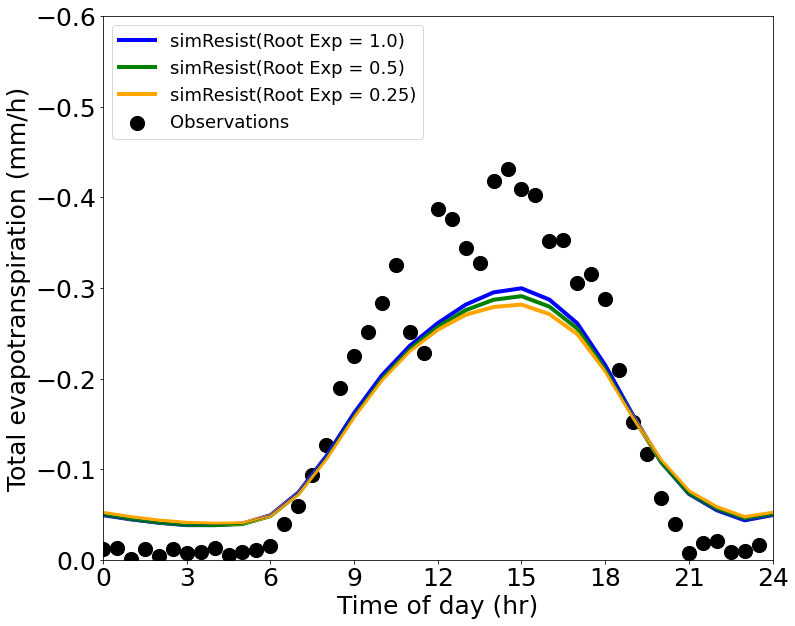

In [35]:
# create plot with the Parameterization of Root Distributions(Root Exp : 1.0, 0.5, 0.25 )
sim_ET_Combine_Graph = sim_ET_Combine.plot(color=['blue', 'green', 'orange'],linewidth=4.0,figsize=(12,10))
# invert y axis
sim_ET_Combine_Graph.invert_yaxis()

sim_ET_Combine_Graph.plot(sim_ET_Combine['simResist(Root Exp = 1.0)'],color='b') 
sim_ET_Combine_Graph.plot(sim_ET_Combine['simResist(Root Exp = 0.5)'], color='g')
sim_ET_Combine_Graph.plot(sim_ET_Combine['simResist(Root Exp = 0.25)'], color='orange')

sim_ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
sim_ET_Combine_Graph.scatter(xvals, df_gp_hr['Observations'], color='black', s=200, label="Observations")
# add x, y label
sim_ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=25)
sim_ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm/h)", fontsize=25)

handles, labels = sim_ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
sim_ET_Combine_Graph.legend(handles[0:4], labels[0:4], loc=2,fontsize=18)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=25)
plt.yticks(fontsize=25)

#### 4.6) Combine the Parameterization of Root Distributions with Ball-Berry method into a single Pandas Dataframe

In [36]:
# create each rootDistExp object
BallBerry_rootDistExp_1 = BallBerry_rootDistExp['sim0']
BallBerry_rootDistExp_0_5 = BallBerry_rootDistExp['sim1']
BallBerry_rootDistExp_0_25 = BallBerry_rootDistExp['sim2']

In [37]:
# Combine ET for each rootDistExp
BallBerry_ET_Combine = pd.concat([BallBerry_rootDistExp_1, BallBerry_rootDistExp_0_5, BallBerry_rootDistExp_0_25], axis=1)
# add label 
BallBerry_ET_Combine.columns = ['BallBerry(Root Exp = 1.0)', 'BallBerry(Root Exp = 0.5)', 'BallBerry(Root Exp = 0.25)']

#### 4.7) Plotting output of the Parameterization of Root Distributions and observation data

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

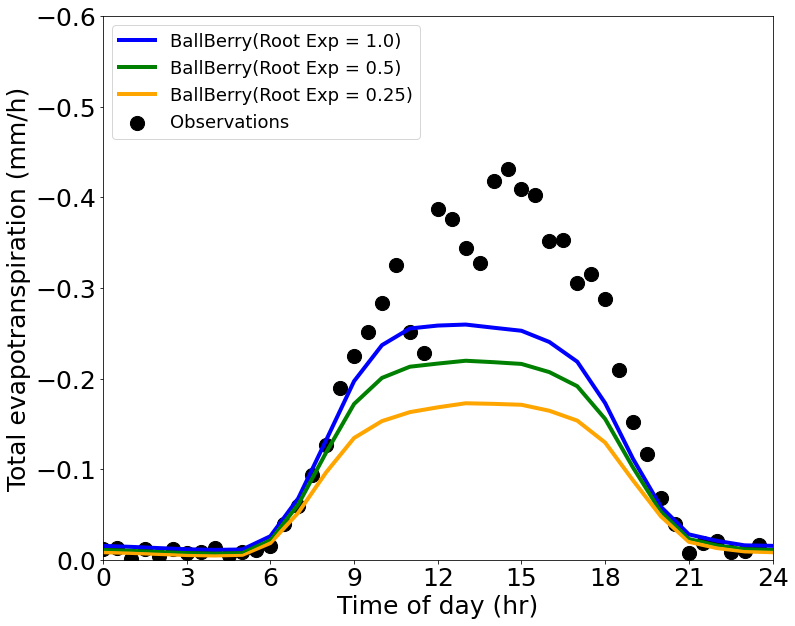

In [38]:
# create plot with the Parameterization of Root Distributions(Root Exp : 1.0, 0.5, 0.25 )
BallBerry_ET_Combine_Graph = BallBerry_ET_Combine.plot(color=['blue', 'green', 'orange'],linewidth=4.0,figsize=(12,10))
# invert y axis
BallBerry_ET_Combine_Graph.invert_yaxis()

BallBerry_ET_Combine_Graph.plot(BallBerry_ET_Combine['BallBerry(Root Exp = 1.0)'],color='b') 
BallBerry_ET_Combine_Graph.plot(BallBerry_ET_Combine['BallBerry(Root Exp = 0.5)'], color='g')
BallBerry_ET_Combine_Graph.plot(BallBerry_ET_Combine['BallBerry(Root Exp = 0.25)'], color='orange')

BallBerry_ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
BallBerry_ET_Combine_Graph.scatter(xvals, df_gp_hr['Observations'], color='black', s=200, label="Observations")
# add x, y label
BallBerry_ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=25)
BallBerry_ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm/h)", fontsize=25)

handles, labels = BallBerry_ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
BallBerry_ET_Combine_Graph.legend(handles[0:4], labels[0:4], loc=2,fontsize=18)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=25)
plt.yticks(fontsize=25)

#### 4.8) Combine the Parameterization of Root Distributions with Jarvis method  into a single Pandas Dataframe

In [39]:
# create each rootDistExp object
Jarvis_rootDistExp_1 = Jarvis_rootDistExp['sim0']
Jarvis_rootDistExp_0_5 = Jarvis_rootDistExp['sim1']
Jarvis_rootDistExp_0_25 = Jarvis_rootDistExp['sim2']

In [40]:
# Combine ET for each rootDistExp
Jarvis_ET_Combine = pd.concat([Jarvis_rootDistExp_1, Jarvis_rootDistExp_0_5, Jarvis_rootDistExp_0_25], axis=1)
# add label 
Jarvis_ET_Combine.columns = ['Jarvis(Root Exp = 1.0)', 'Jarvis(Root Exp = 0.5)', 'Jarvis(Root Exp = 0.25)']

In [41]:
Jarvis_ET_Combine

,Jarvis(Root Exp = 1.0),Jarvis(Root Exp = 0.5),Jarvis(Root Exp = 0.25)
hour,,,
0,-0.011644,-0.007612,-0.005825
1,-0.010777,-0.006907,-0.005214
2,-0.009580,-0.005744,-0.004142
3,-0.008379,-0.004561,-0.003034
4,-0.007768,-0.004037,-0.002612
5,-0.009047,-0.005335,-0.003706
6,-0.025323,-0.020710,-0.016975
7,-0.068072,-0.060880,-0.052039
8,-0.133002,-0.121368,-0.104813


#### 4.9) Plotting output of the Parameterization of Root Distributions and observation data

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

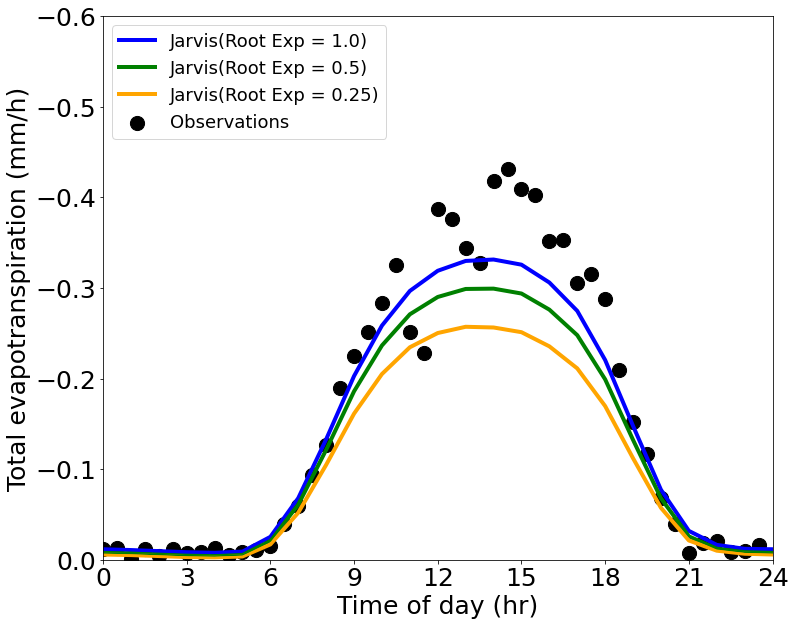

In [42]:
# create plot with the Parameterization of Root Distributions(Root Exp : 1.0, 0.5, 0.25 )
Jarvis_ET_Combine_Graph = Jarvis_ET_Combine.plot(color=['blue', 'green', 'orange'],linewidth=4.0,figsize=(12,10))
# invert y axis
Jarvis_ET_Combine_Graph.invert_yaxis()

Jarvis_ET_Combine_Graph.plot(Jarvis_ET_Combine['Jarvis(Root Exp = 1.0)'],color='b') 
Jarvis_ET_Combine_Graph.plot(Jarvis_ET_Combine['Jarvis(Root Exp = 0.5)'], color='g')
Jarvis_ET_Combine_Graph.plot(Jarvis_ET_Combine['Jarvis(Root Exp = 0.25)'], color='orange')

Jarvis_ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
Jarvis_ET_Combine_Graph.scatter(xvals, df_gp_hr['Observations'], color='black', s=200, label="Observations")
# add x, y label
Jarvis_ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=25)
Jarvis_ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm/h)", fontsize=25)

handles, labels = Jarvis_ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
Jarvis_ET_Combine_Graph.legend(handles[0:4], labels[0:4], loc=2,fontsize=18)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=25)
plt.yticks(fontsize=25)

## 5. Discussion

As stated in Clark et al., 2015, the following insights can be gained from this analysis:

* The simulation in Figure 8 illustrates the sensitivity of evapotranspiration to the distribution of roots, which dictates the capability of plants to access water

* The results in Figure 8 demonstrate strong sensitivities the rooting profile. Lower root distribution exponents place more roots near the surface. This makes it more difficult for plants to extract soil water lower in the soil profile, and decreases transpiration

## 6. Post notebook and simulation results back to Hydroshare

In [57]:
from pysumma.hydroshare import hydroshare
hs = hydroshare.hydroshare()

Successfully established a connection with HydroShare


In [58]:
# zip a renewal SUMMA Model Instance to upload on HydroShare
import shutil, os
archive_name = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance +'_new'))
root_dir = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance))
shutil.make_archive(archive_name, 'zip', root_dir)
Model_instance = os.getcwd() +'/' + instance +'_new.zip'

In [59]:
# set meta data such as abstract, title, keywords, rtype to create a new SUMMA Model Instance
title = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain Eas_new'
abstract = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain East(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'root Distribution', 'Evapotranspiration')
rtype = 'ModelInstanceResource'
fpath = Model_instance,
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [60]:
# create a new SUMMA Model Instance on HydroShare
resource_id1 = hs.createHydroShareResource(title=title, content_files=fpath, keywords=keywords, abstract=abstract, resource_type='modelinstanceresource', public=False)

Resource Created Successfully                           


In [61]:
# set meta data such as abstract, title, keywords, rtype to create a SUMMA Composite Resource that contains SUMMA Model instance, output, and notebook.
title = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain East_new'
abstract = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain East(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'root Distribution', 'Evapotranspiration')
rtype = 'CompositeResource'
files = output_sim_rootDistExp, output_ball_rootDistExp, output_jar_rootDistExp
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [62]:
# create a new SUMMA Composite Resource on HydroShare
resource_id2 = hs.createHydroShareResource(title=title, content_files=files, keywords=keywords, abstract=abstract, resource_type='compositeresource', public=False)

Resource Created Successfully                           
Successfully Added Content Files                      


In [63]:
# add a new SUMMA Model Instance to a new SUMMA Composite Resource.
hs.addContentToExistingResource(resource_id2, [Model_instance])

Successfully Added Content Files                      


#### Save this notebook file to add the notebook to rhe resource of summa output

In [65]:
# add a new notebook to a new SUMMA Composite Resource.
npath = os.getcwd() +'/SummaModel_ReynoldsAspenStand_RootDistribution_Figure8_Left.ipynb'
# check the resource id on HS that created.
hs.addContentToExistingResource(resource_id2, [npath])

Successfully Added Content Files                      
